In [1]:
import random

import requests
!conda install -c conda-forge folium=0.5.0 --yes
import folium
!conda install -c conda-forge geopy --yes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim
print('imported!')


Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py35_1 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge

altair-2.2.2-p 100% |################################| Time: 0:00:00  51.71 MB/s
branca-0.3.1-p 100% |################################| Time: 0:00:00  30.95 MB/s
vincent-0.4.4- 100% |################################| Time: 0:00:00  34.85 MB/s
folium-0.5.0-p 100% |################################| Time: 0:00:00  11.96 MB/s
Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.18.1-py_0 conda-forge

geographiclib- 100% |###################

In [2]:
CLIENT_ID = 'TSLJNFMHHNBM4LEQ30AAPTSDKKZGFOJ2NPHFWOLRK2OFI3DB' # your Foursquare ID
CLIENT_SECRET = 'SGG3HHI4U5H44NIGPVZOY0CVKSWTRXXSTD2BJGCLVP0V0YVK' # your Foursquare Secret
VERSION = '20180817'
limit = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
geolocator=Nominatim(timeout=8)
def get_latlong(address):
    geolocator = Nominatim()
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return (latitude, longitude)



Your credentails:
CLIENT_ID: TSLJNFMHHNBM4LEQ30AAPTSDKKZGFOJ2NPHFWOLRK2OFI3DB
CLIENT_SECRET:SGG3HHI4U5H44NIGPVZOY0CVKSWTRXXSTD2BJGCLVP0V0YVK


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:8: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


In [3]:
def get_venues(address, search_query):
    radius = 500
    latitude, longitude = get_latlong(address)
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&search_query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, limit)
    results = requests.get(url).json()
    venues = results['response']['venues']
    return venues


In [4]:
Nominatim(user_agent="my-application")
address = 'Colaba,Mumbai,India'
search_query = 'cafe'

venues = get_venues(address, search_query)


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:10: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


In [5]:
df_venues = json_normalize(venues)
df_venues


,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'primary': True, 'name': 'Other Great Outdoo...",False,5131cef3e4b0ef4e0cd29ab3,"Cuffe Parade,",IN,Mumbai,India,NaN,667,"[Cuffe Parade,, Mumbai 400 005., Mahārāshtra, ...","[{'lat': 18.914865954838234, 'lng': 72.8196324...",18.914866,72.819632,400 005.,Mahārāshtra,Cuffe Parade,v-1553015662,NaN
1,"[{'primary': True, 'name': 'Automotive Shop', ...",False,4f154dcfe4b0f2c2152e5ffe,"Garage # 4 Heliopolis Bldg, Near Colaba Post-O...",IN,Mumbai,India,"Shahid Bhagat Singh Road, Colaba",390,"[Garage # 4 Heliopolis Bldg, Near Colaba Post-...","[{'lat': 18.913140530916415, 'lng': 72.8228899...",18.913141,72.822890,400005,Mahārāshtra,Car Care Paradise,v-1553015662,89879588
2,"[{'primary': True, 'name': 'Middle Eastern Res...",False,5ac87468838e597251f31d16,"G-1, Minoo Manor",IN,Mumbai,India,Captain Prakash Pethe Marg,280,"[G-1, Minoo Manor (Captain Prakash Pethe Marg)...","[{'lat': 18.917236, 'lng': 72.82457, 'label': ...",18.917236,72.824570,400005,Mahārāshtra,Bayroute,v-1553015662,NaN
3,"[{'primary': True, 'name': 'Hotel', 'id': '4bf...",False,4dab167b4b22f071eac61258,"Shahid Bhagat Singh Rd, Colaba",IN,Mumbai,India,NaN,173,"[Shahid Bhagat Singh Rd, Colaba, Mumbai, Mahār...","[{'lat': 18.915295261952487, 'lng': 72.8243403...",18.915295,72.824340,NaN,Mahārāshtra,Hotel Celeste,v-1553015662,NaN
4,"[{'primary': True, 'name': 'Art Gallery', 'id'...",False,4d528f5a7ee1a35db82c9b34,BMP Building,IN,Mumbai,India,"N.A. Sawant Marg, Colaba",47,"[BMP Building (N.A. Sawant Marg, Colaba), Mumb...","[{'lat': 18.914681932382376, 'lng': 72.8261002...",18.914682,72.826100,NaN,Mahārāshtra,project 88,v-1553015662,NaN
5,"[{'primary': True, 'name': 'Gas Station', 'id'...",False,527c8105498eff4cc16d636f,NaN,IN,NaN,India,NaN,129,[India],"[{'lat': 18.91620445251465, 'lng': 72.82633972...",18.916204,72.826340,NaN,NaN,BP Bunk Colaba,v-1553015662,NaN
6,"[{'primary': True, 'name': 'Men's Store', 'id'...",False,4bdc44a1fed22d7f7b9957c9,"64 Wodehouse Road, Colaba",IN,Mumbai,India,NaN,192,"[64 Wodehouse Road, Colaba, Mumbai 400005, Mah...","[{'lat': 18.915254175568993, 'lng': 72.8241514...",18.915254,72.824151,400005,Mahārāshtra,Charagh Din,v-1553015662,NaN
7,"[{'primary': True, 'name': 'Coffee Shop', 'id'...",False,4c64e9fcae7195210e58957b,"Ayubsons, Opp. Chirag Din Showroom",IN,Mumbai,India,Wodehouse Road,191,"[Ayubsons, Opp. Chirag Din Showroom (Wodehouse...","[{'lat': 18.91524370184546, 'lng': 72.82415953...",18.915244,72.824160,NaN,Mahārāshtra,Cafe Coffee Day,v-1553015662,NaN
8,"[{'primary': True, 'name': 'Nail Salon', 'id':...",False,579af317498ef85a42387776,NaN,IN,NaN,India,NaN,188,[India],"[{'lat': 18.915122, 'lng': 72.824179, 'label':...",18.915122,72.824179,NaN,NaN,Nail Spa by Gurpreet,v-1553015662,NaN
9,"[{'primary': True, 'name': 'Residential Buildi...",False,4df239537d8b18e17229e367,"N.A. Sawant Marg, Colaba",IN,Mumbai,India,NaN,111,"[N.A. Sawant Marg, Colaba, Mumbai 400005, Mahā...","[{'lat': 18.914094, 'lng': 72.826054, 'label':...",18.914094,72.826054,400005,Mahārāshtra,Harbour Heights Residential Complex,v-1553015662,NaN


In [6]:
df_venues = df_venues[['name', 'id']]
df_venues


,name,id
0,Cuffe Parade,5131cef3e4b0ef4e0cd29ab3
1,Car Care Paradise,4f154dcfe4b0f2c2152e5ffe
2,Bayroute,5ac87468838e597251f31d16
3,Hotel Celeste,4dab167b4b22f071eac61258
4,project 88,4d528f5a7ee1a35db82c9b34
5,BP Bunk Colaba,527c8105498eff4cc16d636f
6,Charagh Din,4bdc44a1fed22d7f7b9957c9
7,Cafe Coffee Day,4c64e9fcae7195210e58957b
8,Nail Spa by Gurpreet,579af317498ef85a42387776
9,Harbour Heights Residential Complex,4df239537d8b18e17229e367


In [7]:
def get_rating(venue_id):
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    try:
        result = requests.get(url).json()
        return result['response']['venue']['rating']
    except:
        return None


In [8]:
ratings = []
for i in range(df_venues.shape[0]):
    ratings.append(get_rating(df_venues.iloc[i].id))


In [9]:
ratings


[None,
 None,
 None,
 None,
 None,
 None,
 7.8,
 6.5,
 None,
 None,
 None,
 None,
 6.1,
 None,
 None,
 None,
 None,
 None,
 None,
 5.2,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [10]:
df_venues['rating'] = ratings
df_venues


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,name,id,rating
0,Cuffe Parade,5131cef3e4b0ef4e0cd29ab3,NaN
1,Car Care Paradise,4f154dcfe4b0f2c2152e5ffe,NaN
2,Bayroute,5ac87468838e597251f31d16,NaN
3,Hotel Celeste,4dab167b4b22f071eac61258,NaN
4,project 88,4d528f5a7ee1a35db82c9b34,NaN
5,BP Bunk Colaba,527c8105498eff4cc16d636f,NaN
6,Charagh Din,4bdc44a1fed22d7f7b9957c9,7.8
7,Cafe Coffee Day,4c64e9fcae7195210e58957b,6.5
8,Nail Spa by Gurpreet,579af317498ef85a42387776,NaN
9,Harbour Heights Residential Complex,4df239537d8b18e17229e367,NaN


In [11]:
df_venues = df_venues.sort_values('rating', axis=0, ascending=False)


In [12]:
df_venues.dropna()
df_venues


,name,id,rating
6,Charagh Din,4bdc44a1fed22d7f7b9957c9,7.8
7,Cafe Coffee Day,4c64e9fcae7195210e58957b,6.5
12,Doolally Taproom,58b0520bcf44514697ce9a27,6.1
19,Mexiloko,533832cf498e2f346e40eaec,5.2
0,Cuffe Parade,5131cef3e4b0ef4e0cd29ab3,NaN
1,Car Care Paradise,4f154dcfe4b0f2c2152e5ffe,NaN
2,Bayroute,5ac87468838e597251f31d16,NaN
3,Hotel Celeste,4dab167b4b22f071eac61258,NaN
4,project 88,4d528f5a7ee1a35db82c9b34,NaN
5,BP Bunk Colaba,527c8105498eff4cc16d636f,NaN


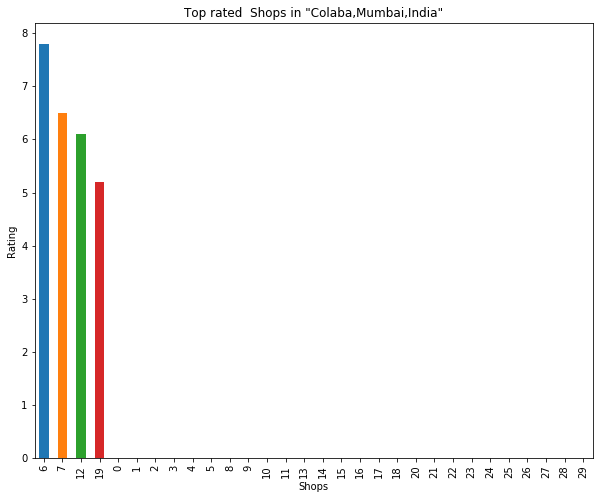

In [14]:
df_venues['rating'].plot(kind='bar', figsize=(10,8))
plt.ylabel('Rating')
plt.xlabel('Shops')
plt.title('Top rated  Shops in "{}"'.format(address))
plt.show()


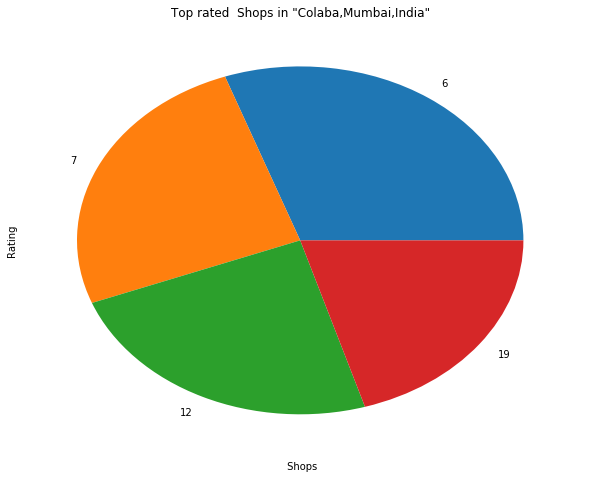

In [15]:
df_venues['rating'].plot(kind='pie', figsize=(10,8))
plt.ylabel('Rating')
plt.xlabel(' Shops')
plt.title('Top rated  Shops in "{}"'.format(address))
plt.show()
